In [1]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
import os
import subprocess
from sklearn.ensemble import AdaBoostClassifier
from time import time
from operator import itemgetter
from scipy.stats import randint
import pandas as pd
from sklearn.ensemble import BaggingClassifier
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

filename = 'df_imputed_scaled_OHE_reducedv1.pkl'
df = pd.read_pickle(filename)
X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])
train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.33,shuffle = True, random_state=45)
pprint('--Data splitted done')

'--Data splitted done'


/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

In [3]:
def run_randomsearch(X, y, clf, para_dist, cv=5,
                     n_iter_search=100):
    """Run a random search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_dist -- [dict] list, distributions of parameters
                  to sample
    cv -- fold of cross-validation, default 5
    n_iter_search -- number of random parameter sets to try,
                     default 20.

    Returns
    -------
    top_params -- [dict] from report()
    """
    random_search = RandomizedSearchCV(clf,
                        param_distributions=param_dist,
                        n_iter=n_iter_search, n_jobs= -1)

    start = time()
    random_search.fit(X, y)
    print(("\nRandomizedSearchCV took {:.2f} seconds "
           "for {:d} candidates parameter "
           "settings.").format((time() - start),
                               n_iter_search))

    top_params = report(random_search.grid_scores_, 3)
    return  top_params

In [4]:
pprint('-- Model Logistic Regression')
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 1, solver = 'lbfgs') 
pprint('-- Model Decision Tree')



model_Decision_Tree =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')


pprint('--------FINISH MODELS CREATED')

'-- Model Logistic Regression'
'-- Model Decision Tree'
'--------FINISH MODELS CREATED'


In [5]:
# dict of parameter list/distributions to sample
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation

kfold = StratifiedKFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
n_estimators_search=list(range(100,1100,100))
range_learning_rate = np.logspace(-5, 2, 8)
min_samples_split = [2, 5, 10]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

max_features = ['auto', 'sqrt']

param_dist={'n_estimators':n_estimators_search,
           'max_depth':max_depth,
           'min_samples_leaf':randint(1,10),
           'learning_rate': range_learning_rate,
           'max_features': max_features,
           }

pprint('----Random Search Decision Tree\n')
gradientBoosting_DT = GradientBoostingClassifier(random_state = 34)
DT_rs = run_randomsearch(X, y, gradientBoosting_DT, param_dist, cv=kfold,
                         n_iter_search=10)





'----Random Search Decision Tree\n'

RandomizedSearchCV took 11.76 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.757 (std: 0.015)
Parameters: {'max_depth': 70, 'learning_rate': 0.1, 'n_estimators': 800, 'max_features': 'sqrt', 'min_samples_leaf': 6}

Model with rank: 2
Mean validation score: 0.752 (std: 0.016)
Parameters: {'max_depth': None, 'learning_rate': 0.1, 'n_estimators': 400, 'max_features': 'sqrt', 'min_samples_leaf': 9}

Model with rank: 3
Mean validation score: 0.752 (std: 0.016)
Parameters: {'max_depth': 110, 'learning_rate': 0.1, 'n_estimators': 400, 'max_features': 'sqrt', 'min_samples_leaf': 9}



In [6]:

#gradientBoosting_DT = GradientBoostingClassifier(learning_rate =  0.001, n_estimators =  900, max_features =  'sqrt', min_samples_leaf = 9, max_depth=  20,random_state = 34)

gradientBoosting_DT = GradientBoostingClassifier(**DT_rs)





In [7]:






from sklearn.model_selection import KFold, StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer
from IPython.display import display, HTML


scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

kfold = StratifiedKFold(n_splits=10, random_state=1) # k=10, split the data into 10 equal parts

classifiers=['gradientBoosting_Tuned']
#models=[gradientBoosting_DT]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1600,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)
models=[gbm_tuned_1]


fit_time = []
score_time = []

test_accuracy = []
test_accuracy_total = []

test_accuracy_std = []
train_accuracy = []
train_accuracy_total = []
train_accuracy_std = []


test_F_score = []
test_F_score_total = []


test_F_score_std = []
train_F_score = []
train_F_score_total = []

train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []









for i in models:
    model = i
    scores = cross_validate(model,X,y, cv = kfold, scoring = scoring, return_train_score=True)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_total.append(scores['test_accuracy'])
    
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_total.append(scores['train_accuracy'])
                          
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_total.append(scores['test_F-score'])
    
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_total.append(scores['train_F-score'])
                         
                         
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)




Model: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=5,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=600,
              min_weight_fraction_leaf=0.0, n_estimators=1600,
              presort='auto', random_state=10, subsample=0.85, verbose=0,
              warm_start=False)


,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
gradientBoosting_Tuned,0.790104,0.059391,0.817631,0.009232


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
gradientBoosting_Tuned,0.814793,0.044366,0.839658,0.008255


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
gradientBoosting_Tuned,0.810341,0.078081,0.817509,0.009221


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
gradientBoosting_Tuned,0.829294,0.071621,0.863129,0.011065


,Fit_time,Scoring Time
gradientBoosting_Tuned,0.918205,0.007928


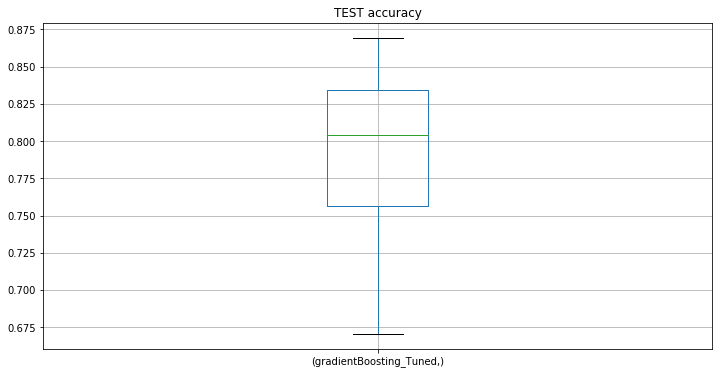

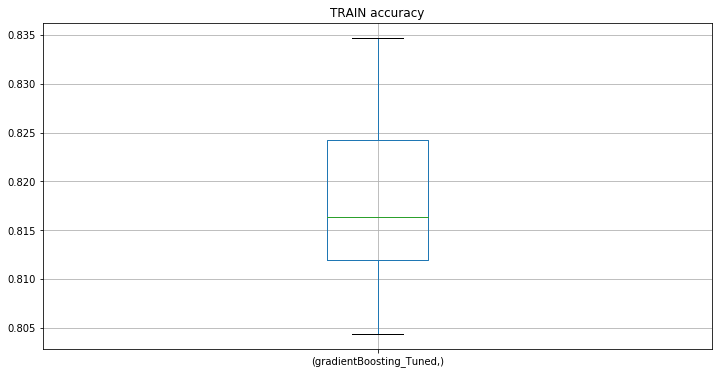

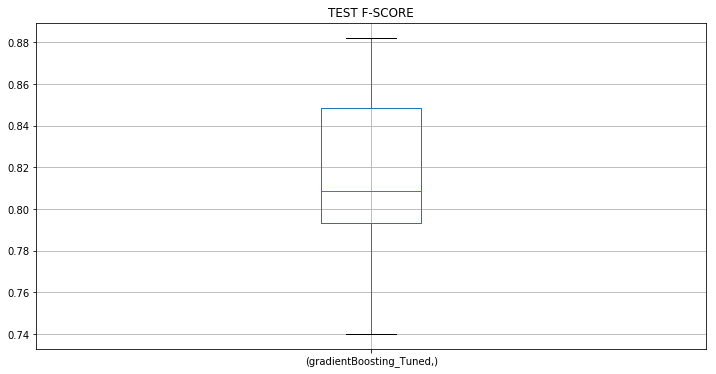

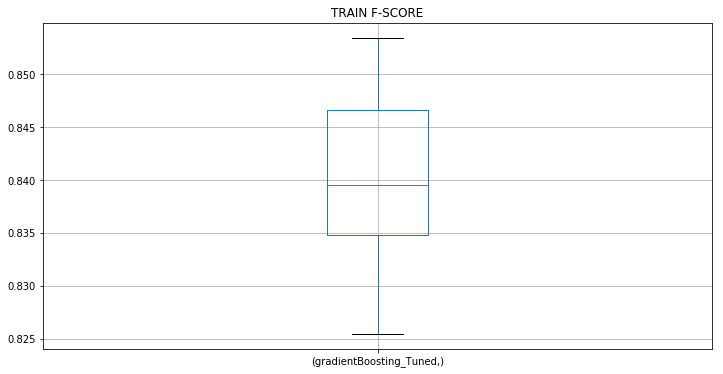

In [9]:
plt.figure(figsize=(12,6))
plt.title('TEST accuracy')
box_test_accuracy=pd.DataFrame(test_accuracy_total, index=[classifiers])
box_test_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN accuracy')
box_train_accuracy=pd.DataFrame(train_accuracy_total,index=[classifiers])
box_train_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TEST F-SCORE')
box_test_F_score=pd.DataFrame(test_F_score_total,index=[classifiers])
box_test_F_score.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN F-SCORE')
box_train_F_score=pd.DataFrame(train_F_score_total,index=[classifiers])
box_train_F_score.T.boxplot()
plt.show()
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,4))
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=800,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)
y_pred = cross_val_predict(gbm_tuned_1,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Matrix for gradientBoost')

plt.show()

[Fold 1/2]
TRAIN: [ 80  81  82  84  85  86  87  88  89  90  92  93  94  98  99 100 101 102
 103 105 112 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308
 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326
 327 328 329 330 331 332 333 334 

this is fpr: [0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.17073171 0.17073171
 0.19512195 0.19512195 0.31707317 0.31707317 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.53658537 0.53658537
 0.56097561 0.56097561 0.58536585 0.58536585 0.73170732 0.73170732
 0.85365854 0.85365854 0.87804878 0.87804878 1.        ]

this is tpr: [0.01960784 0.39215686 0.39215686 0.43137255 0.43137255 0.49019608
 0.49019608 0.54901961 0.54901961 0.60784314 0.60784314 0.62745098
 0.62745098 0.64705882 0.64705882 0.68627451 0.68627451 0.7254902
 0.7254902  0.76470588 0.76470588 0.80392157 0.80392157 0.82352941
 0.82352941 0.90196078 0.90196078 0.92156863 0.92156863 0.94117647
 0.94117647 0.96078431 0.96078431 1.         1.        ]

this is AUC: 0.7824007651841225

[Fold 4/2]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  

this is fpr: [0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.07317073 0.07317073 0.14634146 0.14634146 0.17073171 0.17073171
 0.19512195 0.19512195 0.2195122  0.2195122  0.24390244 0.24390244
 0.34146341 0.34146341 0.48780488 0.48780488 1.        ]

this is tpr: [0.01960784 0.21568627 0.21568627 0.2745098  0.2745098  0.76470588
 0.76470588 0.78431373 0.78431373 0.80392157 0.80392157 0.84313725
 0.84313725 0.88235294 0.88235294 0.94117647 0.94117647 0.96078431
 0.96078431 0.98039216 0.98039216 1.         1.        ]

this is AUC: 0.9220468675274988

[Fold 7/2]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99

this is fpr: [0.         0.         0.02439024 0.02439024 0.02439024 0.02439024
 0.07317073 0.07317073 0.09756098 0.09756098 0.12195122 0.12195122
 0.14634146 0.14634146 0.24390244 0.24390244 0.29268293 0.29268293
 0.34146341 0.34146341 0.36585366 0.36585366 0.41463415 0.41463415
 0.43902439 0.43902439 0.53658537 0.53658537 0.6097561  0.6097561
 0.63414634 0.63414634 0.82926829 0.82926829 1.        ]

this is tpr: [0.01960784 0.05882353 0.05882353 0.11764706 0.15686275 0.25490196
 0.25490196 0.39215686 0.39215686 0.49019608 0.49019608 0.52941176
 0.52941176 0.58823529 0.58823529 0.68627451 0.68627451 0.70588235
 0.70588235 0.7254902  0.7254902  0.8627451  0.8627451  0.90196078
 0.90196078 0.92156863 0.92156863 0.94117647 0.94117647 0.96078431
 0.96078431 0.98039216 0.98039216 1.         1.        ]

this is AUC: 0.7996174079387853

[Fold 10/2]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33

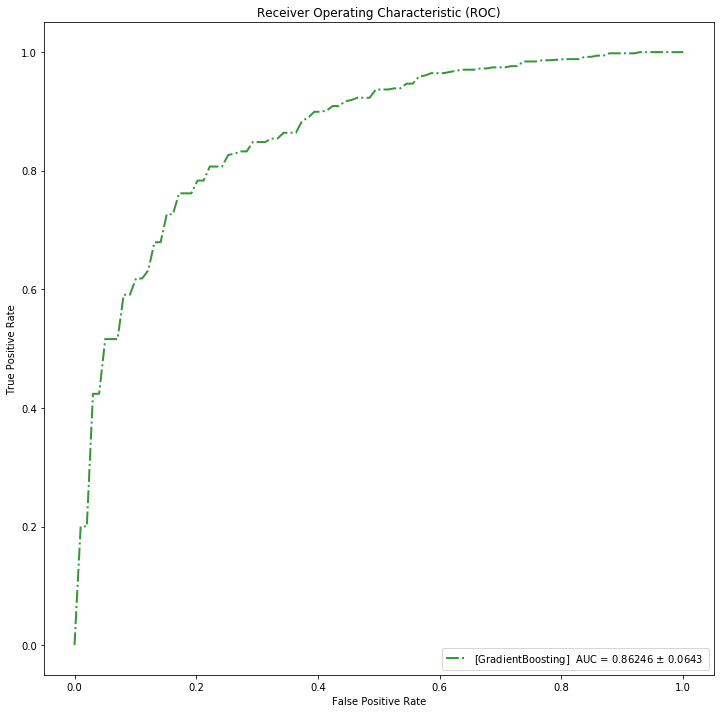

,AUC Mean,std
GradientBoosting,0.862464,0.064272


In [10]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=800,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)
gbm_tuned_rs = GradientBoostingClassifier(learning_rate=0.05, n_estimators=80,max_depth=9, min_samples_split=200, min_samples_leaf=60, subsample=0.9, random_state=10,max_features = 11)
models = [    
    
    {
        'label' : 'GradientBoosting',
        'model': gbm_tuned_rs, 
        'color': 'green',
        'linestyle': '-.',
        'markers': ''
    },

]

# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
splits = 2
cv = StratifiedKFold(n_splits=splits)



tprs = []
aucs = []

mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
stds = []


   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for i,(train_index, test_index) in enumerate(kfold.split(X, y)):
        print('[Fold %d/%d]' % (i + 1, splits))
        print("TRAIN:", train_index, "\nTEST:", test_index)
        train_X = X.iloc[train_index]
        train_y = y.iloc[train_index]
        test_X = X.iloc[test_index]
        test_y = y.iloc[test_index]
        
        
        probas_ = m['model'].fit(train_X, train_y).predict_proba(test_X)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        print('this is fpr: ' + str(fpr) + '\n')
        print('this is tpr: ' + str(tpr) + '\n')
        print('this is AUC: ' + str(roc_auc) + '\n')
        
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    #plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    #         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
   
    std_auc = np.std(aucs)
    

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)
    
   
    aucs_mean.append(mean_auc)
    stds.append(std_auc)
    labels.append(m['label']) 

    
   



    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

plt.show()

AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':stds },index = labels)       
AUCs




In [ ]:
X.iloc[train_index]

In [11]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import StratifiedKFold
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from IPython.display import display, HTML
rcParams['figure.figsize'] = 12, 4
aucs = []
train_cv_scores = []
test_cv_scores = []
auc_all_train = []
auc_all_test = []


tprs = []
aucs = []

mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
stds = []


from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
 # k=10, split the data into 10 equal parts


def modelfit(alg, X, y, performCV=True, printFeatureImportance=True, splits = 10):
    
    cv = StratifiedKFold(n_splits=splits)
     
    for i,(train_index, test_index) in enumerate(cv.split(X, y)):
        print('[Fold %d/%d]' % (i + 1, splits))
        #print("TRAIN:", train_index, "\nTEST:", test_index)
        train_X = X.iloc[train_index]
        train_y = y.iloc[train_index]
        test_X = X.iloc[test_index]
        test_y = y.iloc[test_index]
        
        
    
        test_probas_ = alg.fit(train_X, train_y).predict_proba(test_X)
        test_pred = alg.fit(train_X, train_y).predict(test_X)
        
        train_probas_ = alg.fit(train_X, train_y).predict_proba(train_X)
        train_pred = alg.fit(train_X, train_y).predict(train_X)
        
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, test_probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        #print('this is fpr: ' + str(fpr) + '\n')
        #print('this is tpr: ' + str(tpr) + '\n')
        print('this is AUC: ' + str(roc_auc) + '\n')
        
        aucs.append(roc_auc)
    
        #Fit the algorithm on the data
        alg.fit(X, y)

        #Predict training set:
        dtrain_predictions = train_pred
        dtrain_predprob = train_probas_[:,1]
        #Predict test set:
        dtest_predictions = test_pred
        dtest_predprob = test_probas_[:,1]

        cv_score_train = metrics.accuracy_score(train_y, dtrain_predictions)
       
        cv_score_test = metrics.accuracy_score(test_y, dtest_predictions)
        auc_train = metrics.roc_auc_score(train_y, dtrain_predprob)
        auc_test = metrics.roc_auc_score(test_y, dtest_predprob)
        
        train_cv_scores.append(cv_score_train)
        test_cv_scores.append(cv_score_test)
        auc_all_train.append(auc_train)
        auc_all_test.append(auc_test)
        
   
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
   
    std_auc = np.std(aucs)
    

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)
    
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
   
    
    #if performCV:
     #   print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()
    
    
    aucs_mean.append(mean_auc)
    stds.append(std_auc)
    labels.append(m['label']) 
    

    
    #Print model report:
    print("\nModel Report")
    print("Accuracy train (mean 10-cv): %0.5f $\pm$ %0.4f" %  (np.mean(train_cv_scores, axis=0), np.std(train_cv_scores, axis=0)))
    print("Accuracy test (mean 10-cv): %0.5f $\pm$ %0.4f" % (np.mean(test_cv_scores, axis=0), np.std(test_cv_scores, axis=0)))
    print("AUC Score (Train) (mean 10-cv): %0.5f $\pm$ %0.4f" % (np.mean(auc_all_train, axis=0), np.std(auc_all_train, axis=0)))
    print("AUC Score (Test) (mean 10-cv): %0.5f $\pm$ %0.4f" %(np.mean(auc_all_test, axis=0), np.std(auc_all_test, axis=0)))
    
    AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':stds },index = labels)       
    display(AUCs)


[Fold 1/10]
this is AUC: 0.8702147525676938

[Fold 2/10]
this is AUC: 0.8565279770444763

[Fold 3/10]
this is AUC: 0.7627929220468675

[Fold 4/10]
this is AUC: 0.8479196556671449

[Fold 5/10]
this is AUC: 0.8718316594930655

[Fold 6/10]
this is AUC: 0.912960306073649

[Fold 7/10]
this is AUC: 0.893352462936394

[Fold 8/10]
this is AUC: 0.9320899091343855

[Fold 9/10]
this is AUC: 0.7675753228120517

[Fold 10/10]
this is AUC: 0.7229268292682927



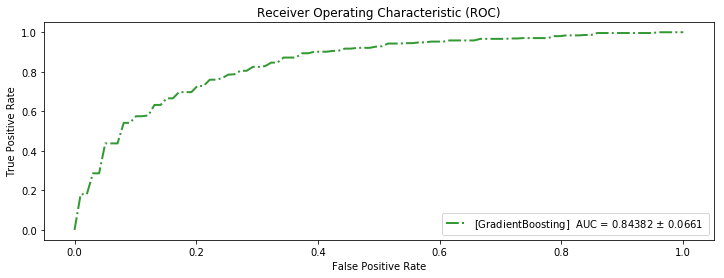

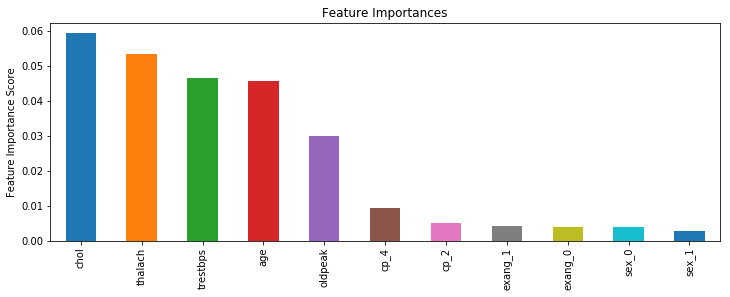


Model Report
Accuracy train (mean 10-cv): 1.00000 $\pm$ 0.0000
Accuracy test (mean 10-cv): 0.77159 $\pm$ 0.0604
AUC Score (Train) (mean 10-cv): 1.00000 $\pm$ 0.0000
AUC Score (Test) (mean 10-cv): 0.84382 $\pm$ 0.0661


,AUC Mean,std
GradientBoosting,0.843819,0.06609


In [12]:
#Choose all predictors except target & IDcols
predictors = X.columns
gbm0 = gradientBoosting_DT
modelfit(gbm0, X, y)

In [13]:
#Choose all predictors except target & IDcols
predictors = X.columns
param_test1 = {'n_estimators':np.arange(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10),param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': array([20, 30, 40, 50, 60, 70, 80])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [14]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.86206, std: 0.04034, params: {'n_estimators': 20},
  mean: 0.86824, std: 0.04016, params: {'n_estimators': 30},
  mean: 0.87085, std: 0.04025, params: {'n_estimators': 40},
  mean: 0.87329, std: 0.04516, params: {'n_estimators': 50},
  mean: 0.87491, std: 0.04520, params: {'n_estimators': 60},
  mean: 0.87666, std: 0.04662, params: {'n_estimators': 70},
  mean: 0.87608, std: 0.04637, params: {'n_estimators': 80}],
 {'n_estimators': 70},
 0.8766641391196561)

In [15]:
param_test2 = {'max_depth':np.arange(5,16,2), 'min_samples_split':np.arange(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.86349, std: 0.06392, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.86966, std: 0.06209, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.87510, std: 0.05820, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.85957, std: 0.06445, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.86980, std: 0.06281, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.87510, std: 0.05820, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.50000, std: 0.00000, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.85642, std: 0.06559, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.86967, std: 0.06341, params: {'max_depth': 9, 'min_samples_split': 400},
  

In [16]:
param_test3 = {'min_samples_split':np.arange(200,701,100), 'min_samples_leaf':np.arange(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=5,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.86207, std: 0.06381, params: {'min_samples_leaf': 30, 'min_samples_split': 200},
  mean: 0.87113, std: 0.06197, params: {'min_samples_leaf': 30, 'min_samples_split': 300},
  mean: 0.87425, std: 0.06253, params: {'min_samples_leaf': 30, 'min_samples_split': 400},
  mean: 0.87372, std: 0.06095, params: {'min_samples_leaf': 30, 'min_samples_split': 500},
  mean: 0.87555, std: 0.05858, params: {'min_samples_leaf': 30, 'min_samples_split': 600},
  mean: 0.50000, std: 0.00000, params: {'min_samples_leaf': 30, 'min_samples_split': 700},
  mean: 0.86536, std: 0.06679, params: {'min_samples_leaf': 40, 'min_samples_split': 200},
  mean: 0.86856, std: 0.06224, params: {'min_samples_leaf': 40, 'min_samples_split': 300},
  mean: 0.87235, std: 0.06352, params: {'min_samples_leaf': 40, 'min_samples_split': 400},
  mean: 0.87390, std: 0.06061, params: {'min_samples_leaf': 40, 'min_samples_split': 500},
  mean: 0.87645, std: 0.05779, params: {'min_samples_leaf': 40, 'min_samples_split': 600},

In [ ]:
modelfit(gsearch3.best_estimator_, X, y)

In [17]:
param_test4 = {'max_features':np.arange(1,13,2)}


gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=5, min_samples_split=600, min_samples_leaf=40, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch4.fit(X,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.87029, std: 0.06152, params: {'max_features': 1},
  mean: 0.87645, std: 0.05779, params: {'max_features': 3},
  mean: 0.87608, std: 0.05804, params: {'max_features': 5},
  mean: 0.87452, std: 0.06105, params: {'max_features': 7},
  mean: 0.87515, std: 0.05940, params: {'max_features': 9},
  mean: 0.87493, std: 0.05950, params: {'max_features': 11}],
 {'max_features': 3},
 0.8764538953792897)

In [18]:
#------------THIS IS BY FAR THE BEST PARAMETERSSSSSS * *** * * * * * * * * * * *
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=5, min_samples_split=600, min_samples_leaf=40, subsample=0.8, random_state=10,max_features = 3),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch5.fit(X,y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_
#------------THIS IS BY FAR THE BEST PARAMETERSSSSSS * *** * * * * * * * * * * *

([mean: 0.50000, std: 0.00000, params: {'subsample': 0.6},
  mean: 0.50000, std: 0.00000, params: {'subsample': 0.7},
  mean: 0.87690, std: 0.05749, params: {'subsample': 0.75},
  mean: 0.87645, std: 0.05779, params: {'subsample': 0.8},
  mean: 0.87684, std: 0.05926, params: {'subsample': 0.85},
  mean: 0.87483, std: 0.06161, params: {'subsample': 0.9}],
 {'subsample': 0.75},
 0.8768979982236799)

[Fold 1/10]
this is AUC: 0.8723155929038282

[Fold 2/10]
this is AUC: 0.9258727881396461

[Fold 3/10]
this is AUC: 0.791248206599713

[Fold 4/10]
this is AUC: 0.8842659014825442

[Fold 5/10]
this is AUC: 0.912960306073649

[Fold 6/10]
this is AUC: 0.9213295074127212

[Fold 7/10]
this is AUC: 0.9227642276422764

[Fold 8/10]
this is AUC: 0.9414155906264945

[Fold 9/10]
this is AUC: 0.8311812529890005

[Fold 10/10]
this is AUC: 0.7678048780487805



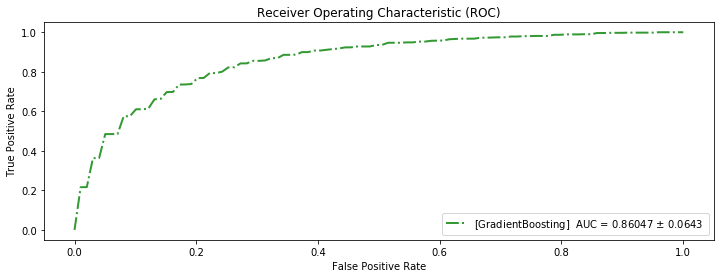

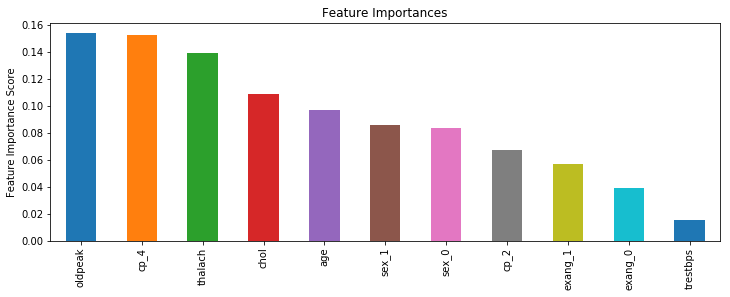


Model Report
Accuracy train (mean 10-cv): 0.90731 $\pm$ 0.0929
Accuracy test (mean 10-cv): 0.78357 $\pm$ 0.0615
AUC Score (Train) (mean 10-cv): 0.94617 $\pm$ 0.0541
AUC Score (Test) (mean 10-cv): 0.86047 $\pm$ 0.0643


,AUC Mean,std
GradientBoosting,0.843819,0.066090
GradientBoosting,0.860468,0.064251


In [19]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=140,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.75, random_state=10,max_features = 3)



modelfit(gbm_tuned_1, X, y)

In [ ]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=800,max_depth=5, min_samples_split=800, min_samples_leaf=30, subsample=0.75, random_state=10,max_features = 3)



modelfit(gbm_tuned_1, X, y)

In [ ]:
#gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=700,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)
#modelfit(gbm_tuned_1, X, y)

gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=30,max_depth=15, min_samples_split=600, min_samples_leaf=40, subsample=0.6, random_state=10,max_features = 1)
modelfit(gbm_tuned_1, X, y)

In [ ]:
#gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1600,max_depth=5, min_samples_split=600, min_samples_leaf=30, subsample=0.85, random_state=10,max_features = 3)
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=80,max_depth=9, min_samples_split=200, min_samples_leaf=60, subsample=0.9, random_state=10,max_features = 11)

modelfit(gbm_tuned_rs, X, y)

min_samples_leaf': 40, 'min_samples_split': 200, 'max_features': 1, 'subsample': 0.6, 'max_depth': 15, 'learning_rate': 0.05, 'n_estimators': 30

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
kfold = StratifiedKFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=80,max_depth=9, min_samples_split=200, min_samples_leaf=60, subsample=0.9, random_state=10,max_features = 11)

param_dist = {'n_estimators':np.arange(20,81,10),
               'max_depth':np.arange(5,16,2), 
               'min_samples_split':np.arange(200,1001,200),
               'min_samples_leaf':np.arange(30,71,10),
               'max_features':np.arange(1,13,2),
               'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
               'learning_rate': [0.1,0.05,0.001]}
pprint('----Random Search GradientBoost\n')
gradientBoosting_DT = GradientBoostingClassifier(random_state = 34)
DT_rs = run_randomsearch(X, y, gradientBoosting_DT, param_dist, cv=kfold,
                         n_iter_search=5832)


In [ ]:
splits = 2
kfold = StratifiedKFold(n_splits=splits)

for i,(train_index, test_index) in enumerate(kfold.split(X, y)):
    print('[Fold %d/%d]' % (i + 1, splits))
    print("TRAIN:", train_index, "\nTEST:", test_index)
  